In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [11]:
file = 'prepped_churn_data_new.csv'
df = pd.read_csv(file, index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_tenure
customerID,,,,,,,,
0,1,0,0.083333,1,29.85,29.85,0,29.850000
1,34,1,1.000000,2,56.95,1889.50,0,55.573529
2,2,1,0.083333,2,53.85,108.15,1,54.075000
3,45,0,1.000000,3,42.30,1840.75,0,40.905556
4,2,1,0.083333,1,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
7038,24,1,1.000000,2,84.80,1990.50,0,82.937500
7039,72,1,1.000000,4,103.20,7362.90,0,102.262500
7040,11,0,0.083333,1,29.60,346.45,0,31.495455


#### Here, I split my data into features/targets and train/test.

In [13]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, stratify=targets, random_state=3)

#### Then, I used a logistic regression model with `max_iter=3333` to fit the training data.

In [15]:
model = LogisticRegression(max_iter=3333)
model.fit(x_train, y_train)

LogisticRegression(max_iter=3333)

In [16]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

#### Here, the model predicted the churn with approximately 80% accuracy on the training data, while the test data had 79% accuracy. 
It's slightly overfitting, but it can predict most of the customer churn. When fitting a model, comparing the no information rate with the model accuracy is important. Our dataset had 73% no information rate, while scoring 80% on the evaluation. So, our model predicted more than the no information rate which usually means that our model was useful.

In [17]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7962371317003905
0.7842441447835344


#### I tried to use `plot_confusion_matrix`, but it was deprecated. So I used `ConfusionMatrixDisplay` instead.

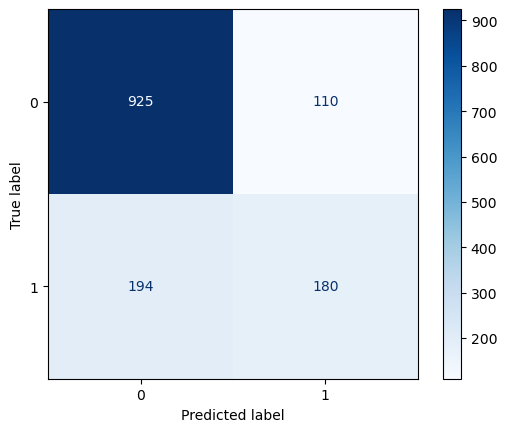

In [18]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap='Blues')

The churn dataset is easily converted into numerical data. The categorical columns 'PhoneService', 'Contract', 'PaymentMethod', and 'Churn' were converted into numerical columns by using binary and label encoding. After cleaning the data, I used a logistic regression model with 80% to 20% data split and 3333 iterations to predict the customer churn. The model predicted the churn with approximately 80% accuracy on the training data, while the test data had 79% accuracy. It's slightly overfitting, but it can predict most of the customer churn. When fitting a model, comparing the no information rate with the model accuracy is important. Our dataset had 73% no information rate, while scoring 80% on the evaluation. So, our model predicted more than the no information rate which usually means that our model was useful.